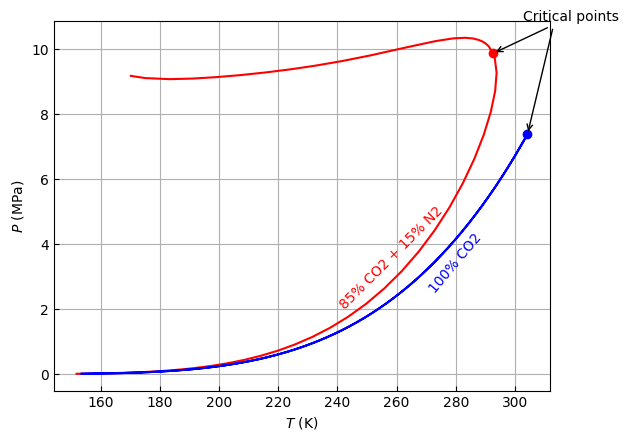

<Figure size 640x480 with 0 Axes>

In [33]:
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.tcPR import tcPR
from thermopack.pcsaft import pcsaft

# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

# Instantiate and initialize tcPR object. Translated and consistent cubic EoS by le Guennec et al. (10.1016/j.fluid.2016.09.003)
tc_pr = tcPR("CO2,N2")
pc_saft = pcsaft("CO2,N2")
model = tc_pr
# Plot phase envelope
z = np.array([0.85,0.15])

T, P, v = model.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, calc_v=True)
Tc, vc, Pc = model.critical(z)
plt.plot(T, P * 1.0e-6, color='r')
plt.plot([Tc], [Pc * 1.0e-6], "ro", label='Critical point')


T1, P1, v1 = model.get_envelope_twophase(1.0e4, [1,0], maximum_pressure=1.5e7, calc_v=True)
Tc1, vc1, Pc1 = model.critical([1,0])
plt.plot(T1, P1 * 1.0e-6, color='b')
plt.plot([Tc1], [Pc1 * 1.0e-6], "bo", label='Critical point')



plt.text(240,2, f'85% CO2 + 15% N2', fontsize=10, rotation = 45, color = 'r')
plt.text(270,2.5, f'100% CO2', fontsize=10, rotation = 50, color = 'b')

# Add annotation with arrow
plt.annotate('Critical points', xy=(Tc, Pc * 1.0e-6), xytext=(Tc + 10, Pc * 1.0e-6 + 1),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('               ', xy=(Tc1, Pc1 * 1.0e-6), xytext=(Tc + 10, Pc * 1.0e-6 + 1),arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')

plt.grid()
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (K)")
plt.show()
plt.clf()


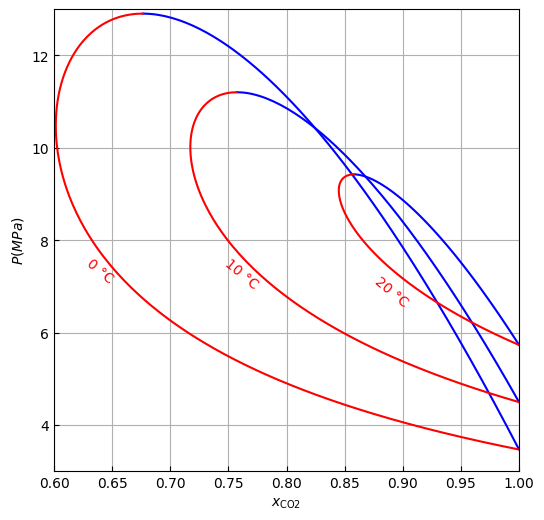

In [50]:
#!/usr/bin/python
# Modify system path
import sys
sys.path.insert(0,'../pycThermopack/')
# Importing pyThermopack
from thermopack.cubic import cubic
# Importing Numpy (math, arrays, etc...)
import numpy as np
# Importing Matplotlib (plotting)
import matplotlib.pyplot as plt

Temps = [273.15, 283.15, 293.15]

plt.figure(1,(6,6))

srk3 = cubic("CO2,N2", "PR")
for Temp in Temps:
    lle, l1ve, l2ve = srk3.get_binary_pxy(Temp, minimum_pressure=0, maximum_pressure=25e6)
    plt.plot(l1ve.x, l1ve.p*1e-6, color="b", ls= "-", label='_nolegend_')
    plt.plot(l1ve.y, l1ve.p*1e-6, color="r", ls="-",label='_nolegend_')
    

    a=6*len(l1ve.y)//10
    # Add text annotation for each plot
    plt.text(l1ve.y[a], l1ve.p[a]*1e-6-1.2, f'{int(Temp-273.15)} °C', fontsize=10, rotation = -40, color = 'r', fontweight = 500)

plt.xlim(0.6,1)
plt.ylim(3,13)

plt.grid()
plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')

plt.xlabel(r"$x_{\rm{CO2}}$")
plt.ylabel(r"$P (MPa)$")

plt.show()


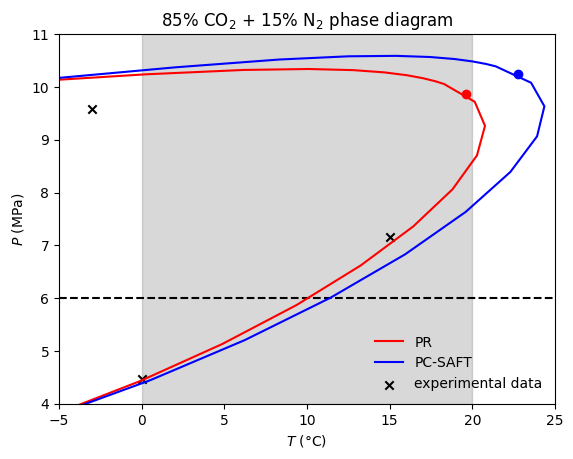

<Figure size 640x480 with 0 Axes>

In [52]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.extended_csp import ext_csp
from thermopack.pcsaft import pcsaft
from thermopack.tcPR import tcPR


tc_pr = tcPR("CO2,N2")
pcs = pcsaft("CO2,N2")

eoss = [tc_pr, pcs]
colors = ["r", "b"]

# Plot phase envelope
x = .85
z = np.array([x, 1-x])

plt.axvspan(0, 20, alpha=0.3, color='gray')

# plt.axvline(0, color='black', alpha=1, linestyle = '--')
# plt.axvline(20, color='black', alpha=1, linestyle = '--')
plt.axhline(6, color='black', alpha=1, linestyle = '--')


P1 = []
P2 = []
T1 = []
T2 = []
for i, eos in enumerate(eoss):
    label = eos.get_model_id()
    T, P, v = eos.get_envelope_twophase(1.0e4,
                                        z,
                                        maximum_pressure=1.5e7,
                                        calc_v=True)
    Tc, vc, Pc = eos.critical(z)
    plt.plot(T - 273, P*1.0e-6, color=colors[i], label=label)
    plt.plot([Tc- 273], [Pc*1.0e-6], color=colors[i], marker="o")
    if label == 'PR':
          P1.append(P*1.0e-6)
          T1.append(T-273.15)
    else:
          P2.append(P*1.0e-6)
          T2.append(T-273.15)
         
plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")
plt.title(str(int(100*x)) + "% CO$_2$ + " + str(int(100-100*x)) + "% N$_2$ phase diagram")



plt.scatter( 269.996-273,9.5824, color = 'black', marker= 'x')
plt.scatter( 288-273,7.15, color = 'black', marker= 'x', label = 'experimental data')
plt.scatter( 0,4.46, color = 'black', marker= 'x')

leg = plt.legend(loc="best", numpoints=1, frameon=False)
plt.xlim(-5,25)
plt.ylim(4,11)
plt.show()
plt.clf()




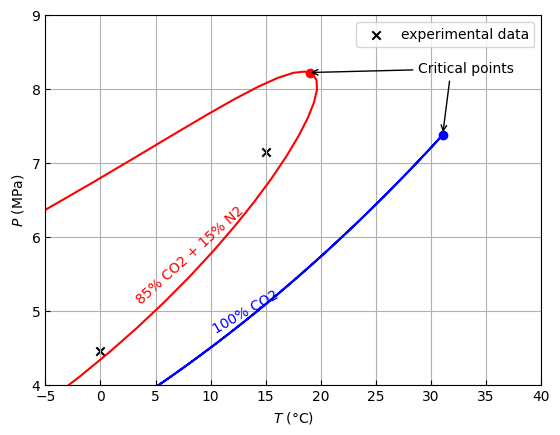

<Figure size 640x480 with 0 Axes>

In [187]:
#!/usr/bin/python
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.tcPR import tcPR

tc_pr = tcPR("CO2,N2")

# Plot phase envelope
x = .85
z = np.array([x, 1-x])

T, P, v = eos.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, calc_v=True, step_size=.1)
Tc, vc, Pc = eos.critical(z)
plt.plot(T - 273, P*1.0e-6, color='r')
plt.plot([Tc - 273], [Pc*1.0e-6], color='r', marker="o")




plt.scatter(269.996 - 273, 9.5824, color='black', marker='x', label='experimental data')
plt.scatter(288 - 273, 7.15, color='black', marker='x', label='_nolegend_')
plt.scatter(0, 4.46, color='black', marker='x', label='_nolegend_')

plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")

plt.xlim(-5, 40)
plt.ylim(4, 9)

leg = plt.legend( numpoints=1, frameon=True)

T1, P1, v1 = model.get_envelope_twophase(1.0e4, [1,0], maximum_pressure=1.5e7, calc_v=True)
Tc1, vc1, Pc1 = model.critical([1,0])
plt.plot(T1-273.15, P1 * 1.0e-6, color='b')
plt.plot([Tc1-273.15], [Pc1 * 1.0e-6], "bo", label='Critical point')





plt.text(3,5.1, f'85% CO2 + 15% N2', fontsize=10, rotation = 42, color = 'r')
plt.text(10,4.7, f'100% CO2', fontsize=10, rotation = 30, color = 'b')

# Add annotation with arrow
plt.annotate('Critical points', xy=(Tc-273.15, Pc * 1.0e-6), xytext=(Tc -273.15+ 10, Pc * 1.0e-6),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('               ', xy=(Tc1-273.15, Pc1 * 1.0e-6), xytext=(Tc-273.15 + 10, Pc * 1.0e-6),arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')

plt.grid()
plt.show()
plt.clf()


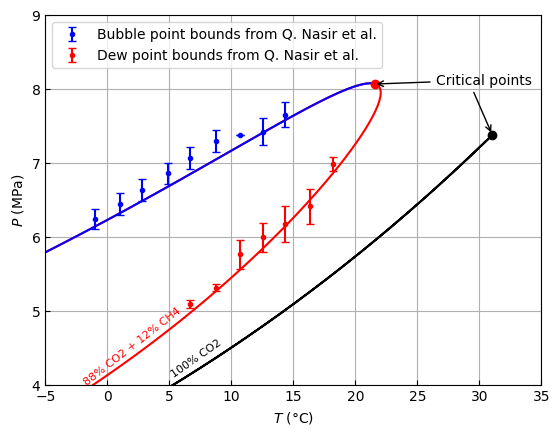

<Figure size 640x480 with 0 Axes>

In [233]:
import sys
sys.path.insert(0,'../pycThermopack/')
import matplotlib.pyplot as plt
import numpy as np
from thermopack.tcPR import tcPR

tc_pr = tcPR("CO2,C1")

eos = tc_pr

# Plot phase envelope
x = .88
z = np.array([x, 1-x])

T, P, v = eos.get_envelope_twophase(1.0e4, z, maximum_pressure=1.5e7, calc_v=True, step_size=.02, minimum_temperature=260)
Tc, vc, Pc = eos.critical(z)
plt.plot(T - 273, P*1.0e-6, color='r')

a=388
plt.plot(T[a:] - 273, P[a:]*1.0e-6, color='b')
plt.plot([Tc- 273], [Pc*1.0e-6], color='r', marker="o")

plt.ylabel(r"$P$ (MPa)")
plt.xlabel(r"$T$ (°C)")

# Bubble point
T = np.array([272.15, 274.15, 275.95, 278.05, 279.85, 281.90, 283.85, 285.70, 287.50, 289.50,291.35, 293.65])-273.15
lower_bound = np.array([6.1,6.3,6.48,6.72,6.92,7.14,7.38,7.24,7.48])
upper_bound = np.array([6.38,6.59,6.78,7,7.21,7.45,7.38,7.6,7.82])
plt.errorbar(T[:-3], (lower_bound+upper_bound)/2, yerr=[(upper_bound[i] - lower_bound[i])/2 for i in range(len(lower_bound))], fmt='.', color='blue', capsize=3, label='Bubble point bounds from Q. Nasir et al.') 
 

# Dew point
lower_bound = np.array([5.03,5.26,5.57,5.8,5.93,6.17,6.89])
upper_bound = np.array([5.15,5.36,5.95,6.18,6.41,6.65,7.08])
plt.errorbar(T[4:-1], (lower_bound+upper_bound)/2, yerr=[(upper_bound[i] - lower_bound[i])/2 for i in range(len(lower_bound))], fmt='.', color='red', capsize=3, label='Dew point bounds from Q. Nasir et al.') 


T1, P1, v1 = model.get_envelope_twophase(1.0e4, [1,0], maximum_pressure=1.5e7, calc_v=True)
Tc1, vc1, Pc1 = model.critical([1,0])
plt.plot(T1-273.15, P1 * 1.0e-6, color='k')
plt.plot([Tc1-273.15], [Pc1 * 1.0e-6], "ko")



plt.annotate('Critical points', xy=(Tc-273.15, Pc * 1.0e-6), xytext=(Tc -273.15+ 5, Pc * 1.0e-6 ),arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('               ', xy=(Tc1-273.15, Pc1 * 1.0e-6), xytext=(Tc-273.15 + 5, Pc * 1.0e-6 ),arrowprops=dict(facecolor='black', arrowstyle='->'))




plt.text(-2,4, f'88% CO2 + 12% CH4', fontsize=8, rotation = 38, color = 'r')
plt.text(5,4.1, f'100% CO2', fontsize=8, rotation = 35, color = 'k')



plt.gca().xaxis.set_tick_params(direction='in')
plt.gca().yaxis.set_tick_params(direction='in')
plt.xlim(-5,35)
plt.ylim(4,9)
plt.grid()
plt.legend(loc="upper left", numpoints=1, frameon=True)
plt.show()
plt.clf()

